# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [15]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [16]:
# Criando a coluna de faixas de latitude
sinasc_raw['faixa_latitude'] = np.where(sinasc_raw['munResLat'] > -10.5, 'Acima de -10.5', 'Abaixo de -10.5')
df=sinasc_raw

In [17]:
# Agrupando pelas faixas de latitude e calculando as estatísticas
grouped = df.groupby('faixa_latitude').agg({
    'IDADEMAE': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'QTDFILVIVO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})


In [18]:
# Exibindo os resultados
grouped_df = grouped.reset_index()
grouped_df


faixa_latitude IDADEMAE                                                 \
                        sum       mean min max median       std        var   
0  Abaixo de -10.5   340167  26.178775  12  53   26.0  6.320171  39.944563   
1   Acima de -10.5   365094  26.014964  11  52   25.0  6.447663  41.572355   

  QTDFILVIVO                                                  
         sum      mean  min   max median       std       var  
0    12601.0  0.980012  0.0  30.0    1.0  1.138256  1.295626  
1    14226.0  1.129317  0.0  12.0    1.0  1.198613  1.436674

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [19]:
# Criando a coluna de faixas de área dos municípios
df['faixa_area'] = np.where(df['munResArea'] > 3000, 'Acima de 3000', 'Abaixo de 3000')

In [20]:
# Agrupando pelas faixas de área e calculando as estatísticas
grouped_area = df.groupby('faixa_area').agg({
    'QTDFILMORT': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'CODOCUPMAE': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

In [21]:
# Transformando o grouped_area em um DataFrame
grouped_area_df = grouped_area.reset_index()
grouped_area_df

faixa_area QTDFILMORT                                                  \
                         sum      mean  min   max median       std       var   
0  Abaixo de 3000     1261.0  0.244949  0.0   4.0    0.0  0.551262  0.303889   
1   Acima de 3000     5383.0  0.272116  0.0  28.0    0.0  0.629081  0.395743   

     CODOCUPMAE                                                             \
            sum           mean      min       max    median            std   
0  3.672919e+09  775531.972551  21205.0  999994.0  999992.0  270719.580340   
1  1.551785e+10  800507.888780  10205.0  999994.0  999992.0  286802.939708   

                 
            var  
0  7.328909e+10  
1  8.225593e+10

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [22]:
# Criando faixas de altitude
df['faixa_altitude'] = pd.cut(df['munResAlt'], bins=[0, 200, 400, 600], labels=['0-200', '200-400', '400-600'])

In [32]:

# Agrupando pelas faixas de altitude e calculando as estatísticas
grouped_altitude = df.groupby('faixa_altitude').agg({
    'KOTELCHUCK': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'CONTADOR': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})
# Transformando o grouped_altitude em um DataFrame
grouped_altitude_df = grouped_altitude.reset_index()

# Exibindo o DataFrame resultante
grouped_altitude_df

faixa_altitude KOTELCHUCK                                               \
                        sum      mean min max median       std       var   
0          0-200     106208  5.099534   1   9    5.0  2.201645  4.847242   
1        200-400      20392  4.638763   1   9    5.0  1.453125  2.111571   
2        400-600       7862  4.358093   1   9    5.0  1.438453  2.069147   

      CONTADOR                                                       \
           sum           mean  min      max   median            std   
0  15285280686  733916.583569   73  2766200  13677.0  740783.454053   
1   3245107444  738195.505914    1  2780269  13378.5  742135.944321   
2   1382893830  766570.859202  144  2777105  12660.5  770403.064038   

                 
            var  
0  5.487601e+11  
1  5.507658e+11  
2  5.935209e+11

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [25]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

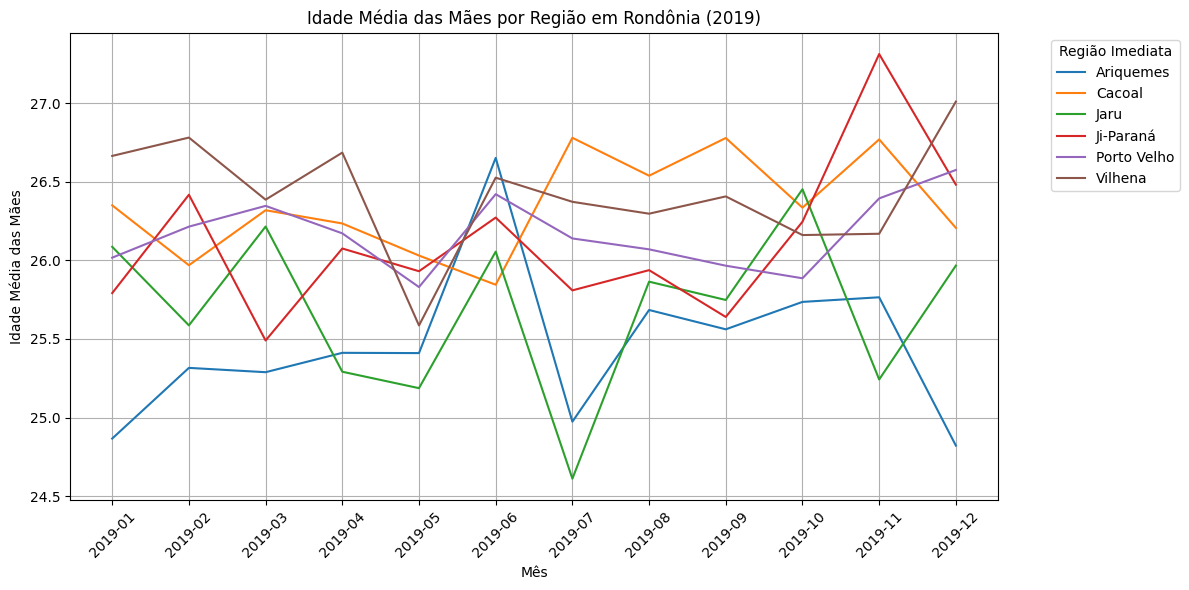

In [26]:
# Adicionar a coluna da região imediata ao dataframe
df['regiao_imediata'] = df['munResNome'].map(imediatas)

# Extrair o mês da coluna de data (assumindo que exista uma coluna 'DTNASC' no formato 'YYYY-MM-DD')
df['DTNASC'] = pd.to_datetime(df['DTNASC'])
df['month'] = df['DTNASC'].dt.to_period('M')

# Calcular a idade média das mães por mês e região imediata
average_age_by_region = df.groupby(['month', 'regiao_imediata'])['IDADEMAE'].mean().unstack()

# Plotar
plt.figure(figsize=(12, 6))
for column in average_age_by_region.columns:
    plt.plot(average_age_by_region.index.astype(str), average_age_by_region[column], label=column)

plt.xlabel('Mês')
plt.ylabel('Idade Média das Mães')
plt.title('Idade Média das Mães por Região em Rondônia (2019)')
plt.legend(title='Região Imediata', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [44]:
import pandas as pd

# Carregar dados extras de regiões e IDH
dados_ro_path = 'dados_extras_ro.csv'
df_dados_ro = pd.read_csv(dados_ro_path, sep=';', encoding='latin-1')

# Criar faixas de IDH
faixas = {
    "Muito Baixo": (0.000, 0.499),
    "Baixo": (0.500, 0.599),
    "Médio": (0.600, 0.699),
    "Alto": (0.700, 0.799),
    "Muito Alto": (0.800, 1.000)
}

# Função para mapear IDH às faixas
def map_idh_to_faixa(idh):
    for faixa, (min_idh, max_idh) in faixas.items():
        if min_idh <= idh <= max_idh:
            return faixa
    return None

# Adicionar coluna de faixa ao DataFrame de IDH
df_dados_ro["IDH_Faixa"] = df_dados_ro["idh"].apply(map_idh_to_faixa)

# Agrupar por região e faixa de IDH, calculando a média dos indicadores (IDH, IFDM, PIB)
df_grouped = df_dados_ro.groupby(['regiao', 'IDH_Faixa']).agg({
    'idh': 'mean',
    'ifdm': 'mean',
    'pib': 'mean'
}).reset_index()

# Exibir o DataFrame agrupado
df_grouped


,regiao,IDH_Faixa,idh,ifdm,pib
0,Ariquemes,Alto,0.702000,0.774600,2.579830e+06
1,Ariquemes,Baixo,0.593000,0.527200,2.088210e+05
2,Ariquemes,Médio,0.624833,0.585933,3.136068e+05
3,Cacoal,Alto,0.709333,0.709300,1.569985e+06
4,Cacoal,Baixo,0.592000,0.504600,2.134100e+05
5,Cacoal,Médio,0.646300,0.600010,2.186496e+05
6,Jaru,Baixo,0.591250,0.524975,2.567090e+05
7,Jaru,Médio,0.689000,0.645000,1.500890e+06
8,Ji-Paraná,Alto,0.714000,0.711700,3.783972e+06
9,Ji-Paraná,Baixo,0.592500,0.574650,1.308875e+05


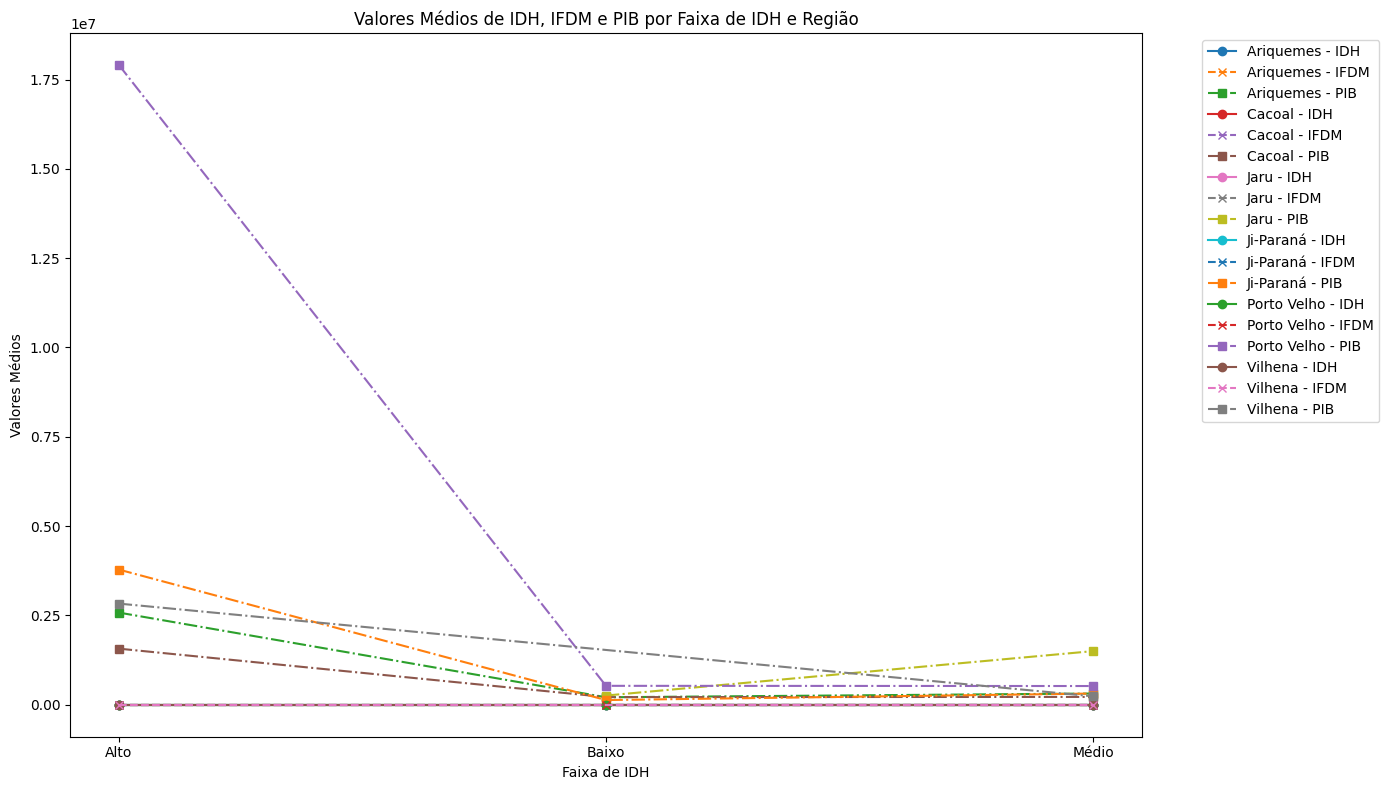

In [39]:
# Carregar dados extras de regiões e IDH
dados_ro_path = 'dados_extras_ro.csv'
df_dados_ro = pd.read_csv(dados_ro_path, sep=';', encoding='latin-1')

# Criar faixas de IDH
faixas = {
    "Muito Baixo": (0.000, 0.499),
    "Baixo": (0.500, 0.599),
    "Médio": (0.600, 0.699),
    "Alto": (0.700, 0.799),
    "Muito Alto": (0.800, 1.000)
}

# Função para mapear IDH às faixas
def map_idh_to_faixa(idh):
    for faixa, (min_idh, max_idh) in faixas.items():
        if min_idh <= idh <= max_idh:
            return faixa
    return None

# Adicionar coluna de faixa ao DataFrame de IDH
df_dados_ro["IDH_Faixa"] = df_dados_ro["idh"].apply(map_idh_to_faixa)

# Agrupar por região e faixa de IDH, calculando a média dos indicadores (IDH, IFDM, PIB)
df_grouped = df_dados_ro.groupby(['regiao', 'IDH_Faixa']).agg({
    'idh': 'mean',
    'ifdm': 'mean',
    'pib': 'mean'
}).reset_index()

# Plotar os resultados
fig, ax = plt.subplots(figsize=(14, 8))

for regiao in df_grouped['regiao'].unique():
    subset = df_grouped[df_grouped['regiao'] == regiao]
    ax.plot(subset['IDH_Faixa'], subset['idh'], marker='o', linestyle='-', label=f'{regiao} - IDH')
    ax.plot(subset['IDH_Faixa'], subset['ifdm'], marker='x', linestyle='--', label=f'{regiao} - IFDM')
    ax.plot(subset['IDH_Faixa'], subset['pib'], marker='s', linestyle='-.', label=f'{regiao} - PIB')

ax.set_xlabel('Faixa de IDH')
ax.set_ylabel('Valores Médios')
ax.set_title('Valores Médios de IDH, IFDM e PIB por Faixa de IDH e Região')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

1-Distribuição do IDH:

A maioria dos municípios apresenta um Índice de Desenvolvimento Humano (IDH) médio a alto, com valores que variam de 0.584 a 0.736. A maioria dos municípios está na faixa de "Médio" a "Muito Alto".

2 Desempenho Regional:

Porto Velho e Ji-Paraná destacam-se com os maiores valores de IDH, IFDM e PIB, sugerindo um desenvolvimento mais robusto e uma economia mais forte nessas regiões.
Cacoal e Vilhena têm uma boa diversidade de municípios com IDH em diferentes faixas, mostrando uma variação mais ampla.

3 Relação entre IDH e PIB:

Em muitos casos, municípios com IDH mais alto tendem a ter PIB mais alto, indicando uma possível correlação positiva entre o IDH e o PIB. Por exemplo, Porto Velho e Ji-Paraná, que têm IDHs altos, também têm PIBs significativos.